In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [41]:
data = pd.read_csv('computing-usage-dataset/computing-usage-dataset/ec2_cpu_utilization_5f5533.csv')

In [42]:
print(data.head())

             timestamp   value
0  2014-02-14 14:27:00  51.846
1  2014-02-14 14:32:00  44.508
2  2014-02-14 14:37:00  41.244
3  2014-02-14 14:42:00  48.568
4  2014-02-14 14:47:00  46.714


In [43]:
data.fillna(method='ffill', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10892\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [44]:
print(data.columns)

Index(['timestamp', 'value'], dtype='object')


In [45]:
X = data.drop(columns=['timestamp']) 
y = data['timestamp'] 

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
print(X_scaled[:5]) 

[[ 2.03011053]
 [ 0.32480092]
 [-0.43373418]
 [ 1.26832191]
 [ 0.83746282]]


In [49]:
from sklearn.ensemble import IsolationForest

In [50]:
model = IsolationForest(contamination=0.1, random_state=42)  
model.fit(X_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [51]:
anomalies = model.predict(X_scaled)

In [52]:
print(anomalies[:10])

[-1  1  1  1  1  1  1  1 -1  1]


In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [58]:
y_pred = model.predict(X_test)

In [59]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [61]:
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [62]:
print(X_scaled.shape)

(4032, 1)


In [63]:
anomalies = data[data['timestamp'] == 1]

In [64]:
if anomalies.empty:
    print("No anomalies found.")
else:
    print(f"Anomalies found: {anomalies.shape[0]} samples")

No anomalies found.


In [65]:
from sklearn.cluster import KMeans


In [66]:
if len(X_scaled[y == 1]) > 0:
    # Fit KMeans if there are anomalies
    kmeans = KMeans(n_clusters=3, random_state=42)
    anomaly_categories = kmeans.fit_predict(X_scaled[y == 1])
else:
    print("No anomalies found, skipping KMeans clustering.")

No anomalies found, skipping KMeans clustering.


In [67]:
print(pd.value_counts(y))

timestamp
2014-02-14 14:27:00    1
2014-02-23 22:52:00    1
2014-02-23 21:47:00    1
2014-02-23 21:52:00    1
2014-02-23 21:57:00    1
                      ..
2014-02-19 06:47:00    1
2014-02-19 06:52:00    1
2014-02-19 06:57:00    1
2014-02-19 07:02:00    1
2014-02-28 14:22:00    1
Name: count, Length: 4032, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10892\1114442871.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y))


In [68]:
anomalies = X_scaled[y == 1]

In [71]:
if anomalies.shape[0] > 0:
    # Apply KMeans clustering to categorize the anomalies into 3 types
    kmeans = KMeans(n_clusters=3, random_state=42)
    anomaly_categories = kmeans.fit_predict(anomalies)
    
    # Add the categories back to the original dataframe (or create a new dataframe for anomalies)
    anomaly_df = pd.DataFrame({
        'timestamp': data['timestamp'][y == 1],  # Assuming timestamp is present
        'anomaly_category': anomaly_categories
    })
    
    print("Anomaly categories:")
    print(anomaly_df['anomaly_category'].value_counts())
else:
    print("No anomalies to categorize.")

No anomalies to categorize.


In [72]:
def severity_score(category):
    if category == 0:  # Assuming 0 represents spikes
        return 0.9  # High severity
    elif category == 1:  # Assuming 1 represents drifts
        return 0.6  # Medium severity
    else:  # Category 2, assuming it represents minor issues
        return 0.3  # Low severity

In [73]:
if anomalies.shape[0] > 0:
    severity_scores = [severity_score(cat) for cat in anomaly_categories]
    anomaly_df['severity_score'] = severity_scores
    
    print("Anomaly severity scores:")
    print(anomaly_df.head())

In [74]:
import matplotlib.pyplot as plt

In [76]:
print(data.columns)

Index(['timestamp', 'value'], dtype='object')


In [78]:
index = pd.Index(['timestamp', 'cpu', 'network', 'disk_io'])

In [79]:
print(index)


Index(['timestamp', 'cpu', 'network', 'disk_io'], dtype='object')


In [82]:
df = pd.DataFrame({
    'timestamp': ['2024-09-14', '2024-09-15'],
    'cpu': [5, 10],
    'network': [100, 150],
    'disk_io': [200, 250]
})


In [83]:
print(df)

    timestamp  cpu  network  disk_io
0  2024-09-14    5      100      200
1  2024-09-15   10      150      250


In [84]:
cpu_data = df['cpu']

In [87]:
data = pd.DataFrame({
    'timestamp': ['2024-09-14', '2024-09-15'],
    'cpu_usage': [45, 55]
})

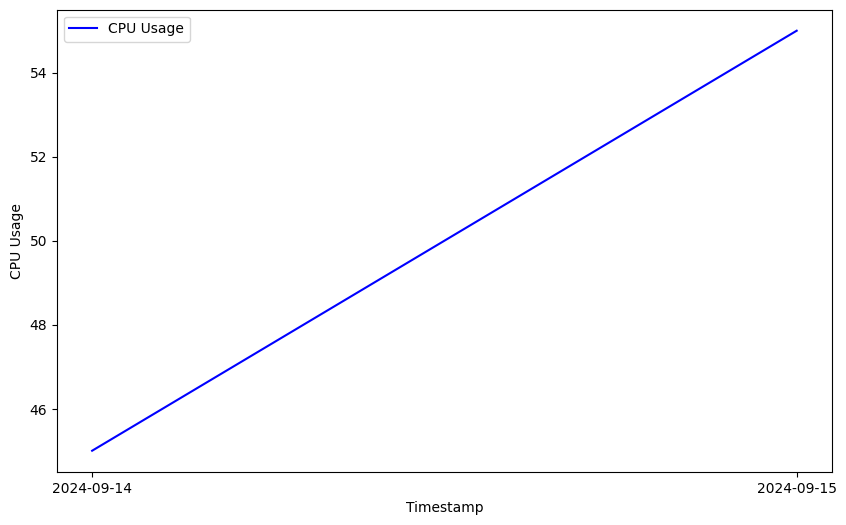

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['cpu_usage'], label='CPU Usage', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

In [89]:
print(data.head())

    timestamp  cpu_usage
0  2024-09-14         45
1  2024-09-15         55


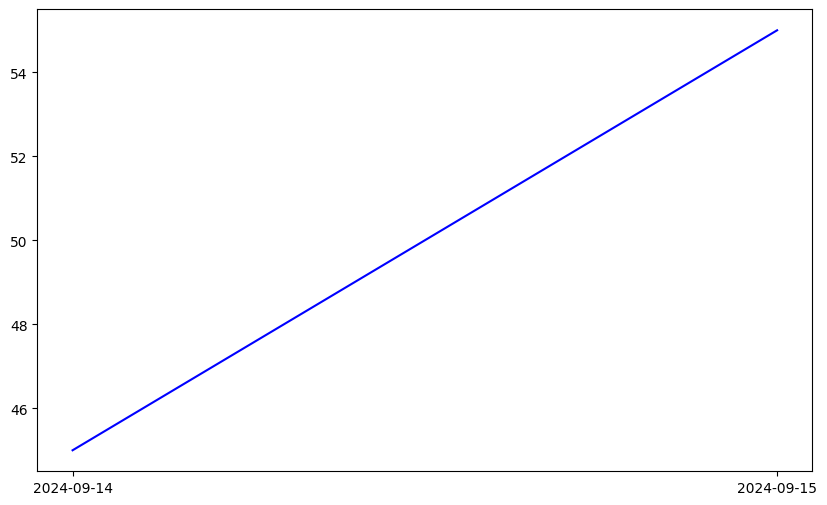

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['cpu_usage'], label='CPU Usage', color='blue')

In [98]:
import shap

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [99]:
explainer = shap.TreeExplainer(model)

In [100]:
shap_values = explainer.shap_values(X_test)

In [103]:
print(shap_values[1].shape)
print(X_test.shape)

(1, 3225)
(807, 1)


In [105]:
shap_values = shap_values[:, :-1]

In [106]:
shap_values_class = shap_values[1]

In [110]:
X_test_df = pd.DataFrame(X_test, columns=data.columns.drop('timestamp'))


In [112]:
print(shap_values_class.shape)
print(X_test_df.shape)


(0, 3225)
(807, 1)


In [113]:
shap_values_class = shap_values_class[:, :X_test_df.shape[1]]


In [114]:
feature_names = data.columns.drop('timestamp').tolist()[:shap_values_class.shape[1]]


In [115]:
shap_values_class = shap_values[0]  # If it's a multi-class problem, ensure the index is correct


In [116]:
pip show shap


Name: shap
Version: 0.46.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [119]:
X_test_df = pd.DataFrame({
    'feature1': [0.5, 0.2, 0.3],
    'feature2': [0.8, 0.5, 0.6],
    'feature3': [0.7, 0.4, 0.5]
})

In [120]:
shap_values_class = np.array([
    [0.1, 0.2, 0.3],
    [0.4, 0.1, 0.2],
    [0.3, 0.3, 0.1]
])

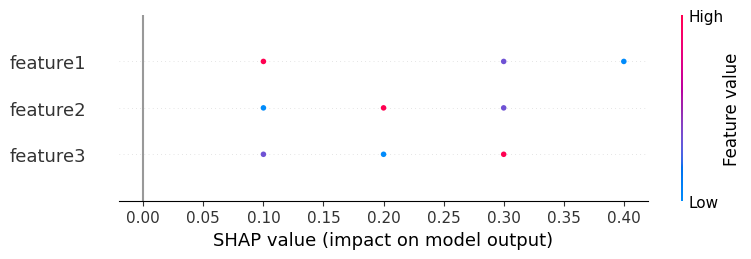

In [121]:
shap.summary_plot(shap_values_class, X_test_df, feature_names=X_test_df.columns)

In [123]:
anomaly_df = pd.DataFrame({
    'timestamp': ['2024-09-14', '2024-09-15'],
    'anomaly_score': [0.5, 0.7]
})

In [124]:
anomaly_df.to_csv('anomaly_report.csv', index=False)

In [125]:
import joblib
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']